示例网页

<img src="./page1.png", width=820>

数据抓取

In [1]:
# 加载用于网页解析的包
from lxml import etree

html = etree.parse('./index.html',etree.HTMLParser())  #解析网页文件
# print(etree.tostring(html).decode('utf-8'))  #展示文件内容

all_node = html.xpath('//*')  # 所有节点的获取 //*
part_node = html.xpath('//li')  # 部分节点 格式：//节点名
print(len(part_node))
child_node = html.xpath('//li/a')  # 匹配子节点
print(len(child_node))
parent_node = html.xpath('//a[@href="//mr90.top"]/../@class')  # 获取父节点属性值的方法 ../@属性名
print(parent_node)
attrs_node = html.xpath('//a[contains(@class,"a")]/text()')   # 获取属性中包含多个值的情况 属性多值匹配 contains()方法
print(attrs_node)

5
5
['parent']
['我的博客地址2']


In [18]:
# 按序获取
first_node = html.xpath('//li[1]/a//text()')  # 获取第一个  下标从1开始
print(first_node)
last_node = html.xpath('//li[last()]//text()')   # 获取最后一个节点
print(last_node)
front_node = html.xpath('//li[position()<3]//text()')    # 获取前两个节点
print(front_node)
end_ndoe = html.xpath('//li[last()-2]//text()')   # 获取到数第三个节点
print(end_ndoe)

['测试', '我的博客地址1']
['我的博客地址5']
['测试', '我的博客地址1', '我的博客地址2']
['我的博客地址3']


In [14]:
# 轴节点
child_node_z = html.xpath('//li[position()<2]/child::a/@href')  # 获取指定节点所有子元素的a节点的href属性值
print(child_node_z)
attribute_node = html.xpath('//li[2]//attribute::lang')  # 获取指定节点的指定元素的属性值
print(attribute_node)
all_child_node = html.xpath('//ul/li[last()-1]//child::*')  # 获取指定节点的所有的文本节点
print(all_child_node)
all_attrs_node = html.xpath('//li[1]/a/attribute::*')  # 获取指定节点的所有属性的属性值
print(all_attrs_node)
all_child_text_node = html.xpath('//li[1]//child::text()')  # 获取指定节点所有文本子节点
print(all_child_text_node)
all_child_node_node = html.xpath('//li[1]/a/child::node()')  # 获取指定节点所有子元素
print(all_child_node_node)
ancestor_self = html.xpath('//a[@title="1"]/../ancestor-or-self::li') # 获取指定元素的所有父辈为li元素的节点（包括当前元素）
print(ancestor_self)

['//mr90.top']
['cn']
[<Element a at 0x14b359b8488>, <Element span at 0x14b359b84c8>, <Element span at 0x14b359b8508>]
['//mr90.top', '1', 'item']
['测试', '我的博客地址1']
[<Element span at 0x14b3598e408>, '我的博客地址1']
[<Element li at 0x14b3598e388>]


常用定位语句实例

//NODE[not(@class)] 所有节点名为node,且不包含class属性的节点

//NODE[@class and @id] 所有节点名为node,且同时包含class属性和id属性的节点

//NODE[contains(text(),substring] 所有节点名为node,且其文本中包含substring的节点

//A[contains(text(),“下一页”)] 所有包含“下一页”字符串的超链接节点

//A[contains(@title,“文章标题”)] 所有其title属性中包含“文章标题”字符串的超链接节点

//NODE[@id=“myid”]/text() 节点名为node,且属性id为myid的节点的所有直接text子节点

BOOK[author/degree] 所有包含author节点同时该author节点至少含有一个的degree孩子节点的book节点

AUTHOR[.=“Matthew Bob”] 所有值为“Matthew Bob”的author节点

//*[count(BBB)=2] 所有包含两个BBB孩子节点的节点

//[count()=2] 所有包含两个孩子节点的节点

//*[name()=‘BBB’] 所有名字为BBB的节点，等同于//BBB

//*[starts-with(name(),‘B’)] 所有名字开头为字母B的节点

//*[contains(name(),‘C’)] 所有名字中包含字母C的节点

//*[string-length(name()) = 3] 名字长度为3个字母的节点

//CCC | //BBB 所有CCC节点或BBB节点

/child::AAA 等价于/AAA

//CCC/descendant:😗 所有以CCC为其祖先的节点

//DDD/parent:😗 DDD节点的所有父节点

//BBB[position() mod 2 = 0] 偶数位置的BBB节点

AUTHOR[not(last-name = “Bob”)] 所有不包含元素last-name的值为Bob的节点

P/text()[2] 当前上下文节点中的P节点的第二个文本节点

ancestor::BOOK[1] 离当前上下文节点最近的book祖先节点

//A[text()=“next”] 锚文本内容等于next的A节点

//div[contains(@class,"card")]//img/@src

//div[contains(@class,"card")]//img/@title

同花顺数据抓取

In [19]:
import requests
from lxml import etree
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体

In [29]:
# 璞泰来   http://stockpage.10jqka.com.cn/603659/
# 抓取公司简介
header = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36"}
url="http://stockpage.10jqka.com.cn/603659/"
req = requests.get(url,headers=header)
print(req)

html = etree.HTML(req.text)#把爬取下来的html变为lxml类型
# print(req.text)

arr=html.xpath('//div[@class="sub_cont_3"]/dl[@class="company_details"]/dd')  #定位到公司简介部分
print(len(arr))

# 简介中包含省略号
# for i,item in enumerate(arr):
#     mylist=item.xpath('text()')
#     if len(mylist)>0:
#         print(mylist[0])
        
#抓取省略信息，被省略的信息在title中
for i,item in enumerate(arr):
    mylist=item.xpath('text()')       
    print('--'+str(i+1))
    if len(mylist)>0: 
        if i==1 or i==3:  #单独处理：设计概念和主营业务
            print(item.xpath('@title')[0])
        else:
            print(mylist[0])    
            
# 抓取净利润
print(arr[7].xpath('text()'))
print(arr[7].xpath('text()')[0][:-2])
# temp=float(arr[7].xpath('text()')[0][:-2])            

<Response [200]>
15
--1
上海市
--2
PVDF概念，MSCI概念，特斯拉，标普道琼斯A股，融资融券，宁德时代概念，沪股通，新能源汽车，锂电池
--3
--4
　　一般项目：高性能膜材料、锂离子电池、电池材料及专用设备技术领域内的技术开发、技术转让、技术服务、技术咨询，实业投资，投资管理，投资咨询；合成材料销售；货物进出口；技术进出口。（除依法须经批准的项目外，凭营业执照依法自主开展经营活动）
--5
2017-11-03
--6
13.68元
--7
1.12元
--8
7.75亿元
--9
293.93%
--10
39.23亿元
--11
1.74元
--12
8.52元
--13
4.08元
--14
6.94亿
--15
6.92亿
['7.75亿元']
7.75


In [30]:
header = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36"}

def getBasicInof(url):

    req = requests.get(url,headers=header)

    html = etree.HTML(req.text)#把爬取下来的html变为lxml类型

    arr=html.xpath('//div[@class="sub_cont_3"]/dl[@class="company_details"]/dd')  #定位到公司简介部分

    # 抓取净利润
    temp=float(arr[7].xpath('text()')[0][:-2])
    return temp    

In [31]:
# 抓取多只股票
url='http://stockpage.10jqka.com.cn/spService/1120/Field/fieldBasic'
req = requests.get(url,headers=header)
print(req)
# print(req.text)

html = etree.HTML(req.text)
arr=html.xpath('//tbody[@id="order_199112_desc"]/tr')
print(len(arr))  #总数
profit=[]
names=[]
for i,item in enumerate(arr):
#     print(item.xpath('td[1]/a/@href')[0])  #编号从1开始
#     print(item.xpath('td[1]/a/text()')[0])
    names.append(item.xpath('td[1]/a/text()')[0])
    url=item.xpath('td[1]/a/@href')[0]
    profit.append(getBasicInof(url))

print(names)
print(profit)

<Response [200]>
10
['友讯达', '星云股份', '金银河', '天奈科技', '大烨智能', '杭州柯林', '迦南智能', '安科瑞', '宝胜股份', '科林电气']
[0.05, 0.61, 0.07, 1.2, 0.18, 0.17, 0.49, 0.93, 1.93, 0.79]


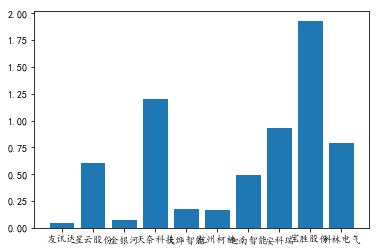

In [32]:
# 绘制各公司的利润率
plt.bar(names,profit)
plt.show()

In [33]:
# 保存数据到csv文件
df=pd.DataFrame(data=[names,profit])
df.to_csv('profit.csv',encoding='GB2312')